In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r3/title_r3_10k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 10000 drug-target pairs
encoding drug...
unique drugs: 9541
encoding protein...
unique target sequence: 1417
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 49.5004. Total time 0.00027 hours
Validation at Epoch 1 with loss:2.32437, MSE: 2.27598 , Pearson Correlation: 0.15089 with p-value: 1.64E-06 , Concordance Index: 0.53598
Training at Epoch 2 iteration 0 with loss 2.29508. Total time 0.00805 hours
Validation at Epoch 2 with loss:2.48758, MSE: 2.33081 , Pearson Correlation: 0.23270 with p-value: 9.19E-14 , Concordance Index: 0.56299
Training at Epoch 3 iteration 0 with loss 2.23194. Total time 0.01611 hours
Validation at Epoch 3 with loss:2.31663, MSE: 2.23862 , Pearson Correlation: 0.31534 with p-value: 1.59E-24 , Concordance Index: 0.59144
Training at Epoch 4 iteration 0 with loss 1.94746. Total time 0.02388 hours
Validation at Epoch 4 with loss:2.29935, MSE: 2.22001 , Pearson Correlation: 0.36819 with p-value: 1.83E-33 , Concordance Index: 0.60937
Training at Epoch 5 iteration 0 with loss 1.92052. Total time 0.03194 hours
Valida

Training at Epoch 39 iteration 0 with loss 0.34692. Total time 0.18777 hours
Validation at Epoch 39 with loss:1.81234, MSE: 1.89711 , Pearson Correlation: 0.50912 with p-value: 4.72E-67 , Concordance Index: 0.66158
Training at Epoch 40 iteration 0 with loss 0.34296. Total time 0.19388 hours
Validation at Epoch 40 with loss:1.83452, MSE: 1.97738 , Pearson Correlation: 0.51212 with p-value: 5.90E-68 , Concordance Index: 0.66280
Training at Epoch 41 iteration 0 with loss 0.50058. Total time 0.20194 hours
Validation at Epoch 41 with loss:2.05653, MSE: 1.89216 , Pearson Correlation: 0.51478 with p-value: 9.22E-69 , Concordance Index: 0.66446
Training at Epoch 42 iteration 0 with loss 0.36945. Total time 0.21055 hours
Validation at Epoch 42 with loss:1.85745, MSE: 1.83654 , Pearson Correlation: 0.51740 with p-value: 1.46E-69 , Concordance Index: 0.66453
Training at Epoch 43 iteration 0 with loss 0.31773. Total time 0.22027 hours
Validation at Epoch 43 with loss:1.88393, MSE: 1.87036 , Pearso

Validation at Epoch 77 with loss:2.03530, MSE: 2.03915 , Pearson Correlation: 0.49287 with p-value: 2.51E-62 , Concordance Index: 0.65751
Training at Epoch 78 iteration 0 with loss 0.17442. Total time 0.68305 hours
Validation at Epoch 78 with loss:1.71584, MSE: 1.98694 , Pearson Correlation: 0.48959 with p-value: 2.10E-61 , Concordance Index: 0.65536
Training at Epoch 79 iteration 0 with loss 0.14368. Total time 0.69472 hours
Validation at Epoch 79 with loss:1.93267, MSE: 1.97614 , Pearson Correlation: 0.49008 with p-value: 1.53E-61 , Concordance Index: 0.65644
Training at Epoch 80 iteration 0 with loss 0.17779. Total time 0.70777 hours
Validation at Epoch 80 with loss:1.98947, MSE: 1.96708 , Pearson Correlation: 0.49946 with p-value: 3.26E-64 , Concordance Index: 0.65954
Training at Epoch 81 iteration 0 with loss 0.13395. Total time 0.72055 hours
Validation at Epoch 81 with loss:2.10941, MSE: 2.01167 , Pearson Correlation: 0.49794 with p-value: 8.93E-64 , Concordance Index: 0.65885
Tr

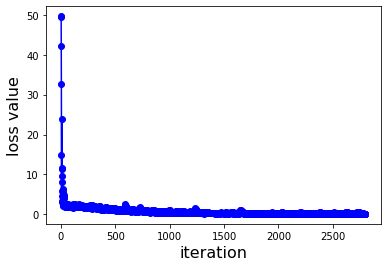

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r3/model_r3_10k_100epochs')